## Imports

In [1]:
import os
import re
import sys
import typing
import gc
import pandas as pd
import pickle
import logging

sys.path.append(
    os.path.join('.','src')
)

from src.models import Pipeline

In [2]:
logging.basicConfig(filename='logs/logs.log', level=logging.DEBUG)

# Tweets Model

In [ ]:
pipeline = Pipeline('CONFIG_MODEL_TWEETS.json', load_model_data = True)

100%|██████████| 10022598/10022598 [17:08<00:00, 9740.71it/s] 


In [ ]:
d = {
    'train_set_len' : len(pipeline.train_dataset),
    'train_set_tokens' : pipeline.train_dataset.token_len(),
    'val_set_len' : len(pipeline.val_dataset),
    'val_set_tokens' : pipeline.val_dataset.token_len(),
    'test_set_len' : len(pipeline.test_dataset),
    'test_set_tokens' : pipeline.test_dataset.token_len(),
}

In [ ]:
d

In [5]:
pipeline.perplexity()

  9%|▉         | 96868/1035304 [05:28<53:00, 295.07it/s]  


KeyboardInterrupt: 

  0%|          | 0/1541342 [00:00<?, ?it/s]

Train loss at epoch 0 : 10.812868297920117
Eval loss at epoch 0 : 10.81283332563471
updating best metric


100%|██████████| 512927/512927 [17:14<00:00, 495.73it/s]


Train loss at epoch 1 : 4.921052994411234
Eval loss at epoch 1 : 7.638029842873025
updating best metric


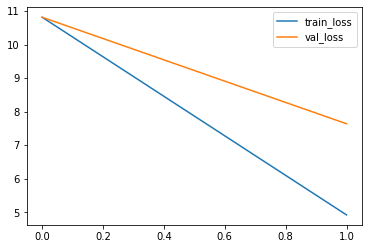

In [6]:
pipeline.train_model()

In [7]:
pipeline.perplexity()

100%|██████████| 1035304/1035304 [59:11<00:00, 291.54it/s] 


(76.50194053094972, 4.354531535130592)

In [5]:
pipeline = Pipeline('CONFIG_MODEL_TWEETS.json', load_model_data = False)

100%|██████████| 5000/5000 [00:01<00:00, 4413.37it/s]


In [6]:
pipeline.load_model('models/tweets/tweets.pth')

In [18]:
pipeline.generate(start_text = 'all', num_words = 40)

'all of trumps lies about clinton needs rating pence is what us has done with realdonaldtrump usama realdonaldtrump treat more people in support or donald trump or clinton or someone who wants to be a pres none of these people died'

In [19]:
pipeline.generate(start_text = 'what', num_words = 40)

'what is grateful facts are correct that trump is trying to put his mainstream media into the table over tim kaine as pence running for president for hillary clinton a threat to press freedom that could be called the sand liar'

In [20]:
pipeline.generate(start_text = 'i like', num_words = 40)

'i like mike pence is like bill clinton is a drink should he write his numbers over the monkey patriots attend a campaign before he touches the woman tipped off both sides of their policy is worthy of race is over in'

# Wiki Model

In [4]:
pipeline = Pipeline('CONFIG_MODEL_WIKI.json', load_model_data = True)

100%|██████████| 61/61 [00:01<00:00, 54.24it/s]


In [5]:
pipeline.perplexity(with_recall = True, with_tqdm = True)

100%|██████████| 1552/1552 [00:08<00:00, 179.26it/s]


(9978.596791957554,
 9.20816275262341,
 4.7750279680209556e-05,
 0.00010914349641190756)

In [22]:
pipeline.load_model('models/wiki103/wiki103.pth')

In [7]:
pipeline.perplexity(with_recall = True, with_tqdm = True)

100%|██████████| 1552/1552 [00:08<00:00, 184.45it/s]


(107.89885933974432,
 4.6848593378804395,
 0.23536795001227864,
 0.3685161941662801)

  0%|          | 0/79419 [00:00<?, ?it/s]

Train loss at epoch 0 : 10.81245187593375
Eval loss at epoch 0 : 10.812277486954612
updating best metric


100%|██████████| 174/174 [00:00<00:00, 200.67it/s]


Train loss at epoch 1 : 5.108607498030803
Eval loss at epoch 1 : 8.684686896444736
updating best metric


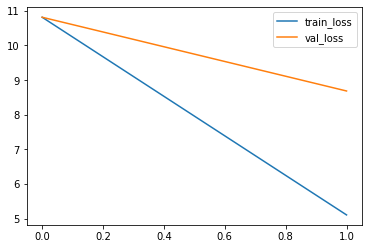

In [7]:
pipeline.train_model()

In [8]:
pipeline.perplexity()

100%|██████████| 1552/1552 [00:07<00:00, 217.94it/s]


(107.89885933974432, 4.684859333886314)

In [25]:
pipeline.generate(start_text = 'all', num_words=40)

'all the freedom of justice having been known for you. The government of the community s difficulties is not having any connections to someone around possible in the United States reaches the national resolution of Poland. Ina campaign violation'

In [32]:
pipeline.generate(start_text = 'what', num_words=40)

'what is due to the actual load of human. It is a key area but use to fire the aircraft with a head of the order of the recent rounds of missiles and air to core monsters. The aircraft'

In [29]:
pipeline.generate(start_text = 'i like')

"i like eleven `` '' But on His set you loved a song. He did. He cited a sound that are not in talking with his play up to our high ground style being stolen from himself. `` included a `` critical `` score '' If you can all have taking a touchdown '' came to UK State on September ; Japan was a `` National League Head `` for the National Rugby Olympics. Soon as the second riders win on the return Morris was their fourth spot in the team s history that s the team s"

In [5]:
d = {
    'train_set_len' : len(pipeline.train_dataset),
    'train_set_tokens' : pipeline.train_dataset.token_len(),
    'val_set_len' : len(pipeline.val_dataset),
    'val_set_tokens' : pipeline.val_dataset.token_len(),
    'test_set_len' : len(pipeline.test_dataset),
    'test_set_tokens' : pipeline.test_dataset.token_len(),
}

In [6]:
d

{'train_set_len': 2541430,
 'train_set_tokens': 62085955,
 'val_set_len': 5589,
 'val_set_tokens': 137800,
 'test_set_len': 6211,
 'test_set_tokens': 151750}

## FedSGD

In [1]:
from src.federated_pipeline import Federated_SGD

In [2]:
federated = Federated_SGD(
    "CONFIG_MODEL_TWEETS.json",
    "CONFIG_FEDERATED_TWEETS.json",
    testing = True
)

100%|██████████| 5/5 [00:11<00:00,  2.25s/it]


In [3]:
federated.train(2, save_results = True, plt_name = 'test_0')

100%|██████████| 193/193 [00:00<00:00, 297.05it/s]


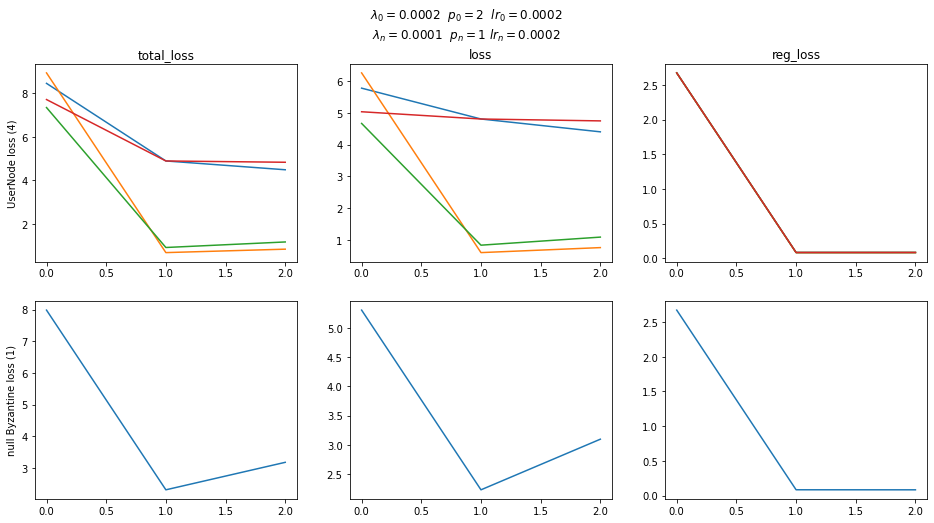

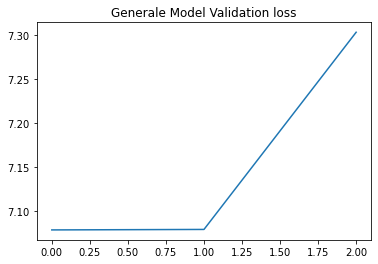

In [4]:
federated.plot_training_history(save_results=False, plt_name = '')

## FedSGD

In [1]:
import os

In [1]:
for i,f in enumerate(os.listdir('nodes_data/nodes_data_tweets/')):
    tmp = f.split('_')
    tmp[1] = str(i+1)
    tmp = '_'.join(tmp)
    os.rename(
        os.path.join('nodes_data/nodes_data_tweets',f),
        os.path.join('nodes_data/nodes_data_tweets',tmp)
    )

NameError: name 'os' is not defined

In [2]:
from src.federated_pipeline import Federated_SGD

import os
import pickle
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
federated = Federated_SGD(
    "CONFIG_MODEL_TWEETS.json",
    "CONFIG_FEDERATED_TWEETS.json",
    testing = True
)

100%|██████████| 5/5 [00:02<00:00,  2.32it/s]


In [4]:
federated.train(20)

  2%|▏         | 4/193 [00:00<00:05, 34.71it/s]

round 0


  0%|          | 0/5 [00:00<?, ?it/s]

round 1


  0%|          | 0/5 [00:00<?, ?it/s]

round 2


  0%|          | 0/5 [00:00<?, ?it/s]

round 3


  0%|          | 0/5 [00:00<?, ?it/s]

round 4


  0%|          | 0/5 [00:00<?, ?it/s]

round 5


  0%|          | 0/5 [00:00<?, ?it/s]

round 6


  0%|          | 0/5 [00:00<?, ?it/s]

round 7


  0%|          | 0/5 [00:00<?, ?it/s]

round 8


  0%|          | 0/5 [00:00<?, ?it/s]

round 9


  0%|          | 0/5 [00:00<?, ?it/s]

round 10


  0%|          | 0/5 [00:00<?, ?it/s]

round 11


  0%|          | 0/5 [00:00<?, ?it/s]

round 12


  0%|          | 0/5 [00:00<?, ?it/s]

round 13


  0%|          | 0/5 [00:00<?, ?it/s]

round 14


  0%|          | 0/5 [00:00<?, ?it/s]

round 15


  0%|          | 0/5 [00:00<?, ?it/s]

round 16


  0%|          | 0/5 [00:00<?, ?it/s]

round 17


  0%|          | 0/5 [00:00<?, ?it/s]

round 18


  0%|          | 0/5 [00:00<?, ?it/s]

round 19


  0%|          | 0/5 [00:00<?, ?it/s]

round 20


100%|██████████| 193/193 [00:05<00:00, 36.62it/s]


In [5]:
dir_ = os.path.join('tweets', 'FedSGD')
res = {}
for i,name in enumerate(os.listdir(dir_)):
    with open(os.path.join(dir_, name, 'metrics.pickle'), 'rb') as f:
        res[i] = pickle.load(f)

In [14]:
pd.DataFrame(res[0]).T.filter(regex='f3_recall_').T.mean()

0     0.335426
1     0.335472
2     0.336613
3     0.336958
4     0.337720
5     0.337925
6     0.337953
7     0.337975
8     0.338480
9     0.338393
10    0.338167
11    0.337954
12    0.337958
13    0.338226
14    0.338265
15    0.338441
16    0.338570
17    0.338459
18    0.338551
19    0.338894
20    0.338464
dtype: float64

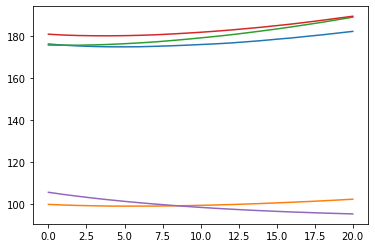

In [6]:
plt.figure()
for k,v in pd.DataFrame(res[0]).T.to_dict().items():
    if 'perplexity_' in k:
        plt.plot(list(v.values()))

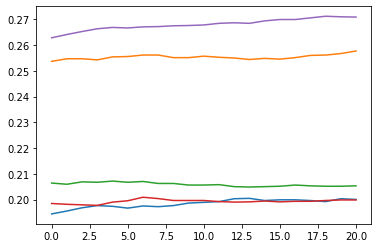

In [7]:
plt.figure()
for k,v in pd.DataFrame(res[0]).T.to_dict().items():
    if 'f1_recall_' in k:
        plt.plot(list(v.values()))

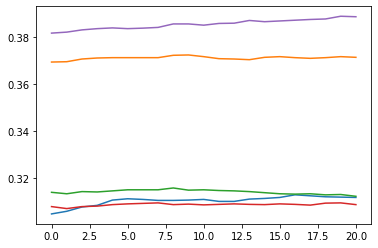

In [8]:
plt.figure()
for k,v in pd.DataFrame(res[0]).T.to_dict().items():
    if 'f3_recall_' in k:
        plt.plot(list(v.values()))

In [ ]:
for i in range(50):
    print(' '.join([federated.vocabulary.idx_to_word[x.item()] for x in federated.nodes[2].data[i]]))

## FedAVG

In [2]:
from src.federated_pipeline import Federated_AVG

import os
import pickle

import matplotlib.pyplot as plt
import pandas as pd

In [3]:
federated = Federated_AVG(
    "CONFIG_MODEL_TWEETS.json",
    "CONFIG_FEDERATED_TWEETS.json",
    testing = True
)

100%|██████████| 5/5 [00:02<00:00,  2.20it/s]


In [4]:
federated.train(20)

  2%|▏         | 4/193 [00:00<00:06, 30.78it/s]

round 0


  0%|          | 0/5 [00:00<?, ?it/s]

round 1


  0%|          | 0/5 [00:00<?, ?it/s]

round 2


  0%|          | 0/5 [00:00<?, ?it/s]

round 3


  0%|          | 0/5 [00:00<?, ?it/s]

round 4


  0%|          | 0/5 [00:00<?, ?it/s]

round 5


  0%|          | 0/5 [00:00<?, ?it/s]

round 6


  0%|          | 0/5 [00:00<?, ?it/s]

round 7


  0%|          | 0/5 [00:00<?, ?it/s]

round 8


  0%|          | 0/5 [00:00<?, ?it/s]

round 9


  0%|          | 0/5 [00:00<?, ?it/s]

round 10


  0%|          | 0/5 [00:00<?, ?it/s]

round 11


  0%|          | 0/5 [00:00<?, ?it/s]

round 12


  0%|          | 0/5 [00:00<?, ?it/s]

round 13


  0%|          | 0/5 [00:00<?, ?it/s]

round 14


  0%|          | 0/5 [00:00<?, ?it/s]

round 15


  0%|          | 0/5 [00:00<?, ?it/s]

round 16


  0%|          | 0/5 [00:00<?, ?it/s]

round 17


  0%|          | 0/5 [00:00<?, ?it/s]

round 18


  0%|          | 0/5 [00:00<?, ?it/s]

round 19


  0%|          | 0/5 [00:00<?, ?it/s]

round 20


100%|██████████| 193/193 [00:04<00:00, 39.18it/s]


In [5]:
dir_ = os.path.join('tweets', 'FedAVG')
res = {}
for i,name in enumerate(os.listdir(dir_)):
    with open(os.path.join(dir_, name, 'metrics.pickle'), 'rb') as f:
        res[i] = pickle.load(f)

In [6]:
pd.DataFrame(res[0]).T.filter(regex='f3_recall_').T.mean()

0     0.335426
1     0.336464
2     0.337544
3     0.337652
4     0.338360
5     0.338003
6     0.338955
7     0.338971
8     0.339292
9     0.339236
10    0.339711
11    0.338882
12    0.338361
13    0.337617
14    0.337012
15    0.337758
16    0.338057
17    0.338033
18    0.337505
19    0.337692
20    0.338027
dtype: float64

In [7]:
max(pd.DataFrame(res[0]).T.filter(regex='f3_recall_').T.mean())

0.3397107232197246

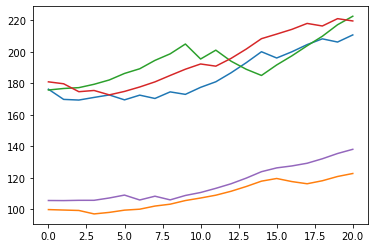

In [8]:
plt.figure()
for k,v in pd.DataFrame(res[0]).T.to_dict().items():
    if 'perplexity_' in k:
        plt.plot(list(v.values()))

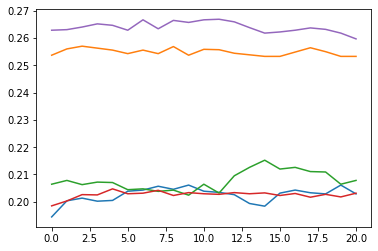

In [9]:
plt.figure()
for k,v in pd.DataFrame(res[0]).T.to_dict().items():
    if 'f1_recall_' in k:
        plt.plot(list(v.values()))

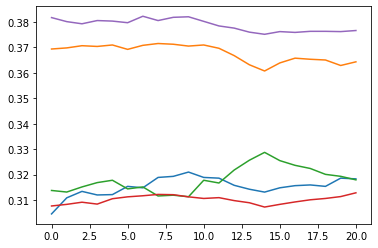

In [10]:
plt.figure()
for k,v in pd.DataFrame(res[0]).T.to_dict().items():
    if 'f3_recall_' in k:
        plt.plot(list(v.values()))

In [1]:
from src.federated_pipeline import Federated_LICCHAVI

import os
import pickle
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
federated = Federated_LICCHAVI(
    "CONFIG_MODEL_TWEETS.json",
    "CONFIG_FEDERATED_TWEETS.json",
    testing = True
)

100%|██████████| 50/50 [00:19<00:00,  2.55it/s]


In [3]:
federated.train(5)

  0%|          | 0/50 [00:00<?, ?it/s]

round 0


  0%|          | 0/50 [00:00<?, ?it/s]

round 1


  0%|          | 0/50 [00:00<?, ?it/s]

round 2


 68%|██████▊   | 34/50 [00:53<00:25,  1.58s/it]


KeyboardInterrupt: 

In [9]:
dir_ = os.path.join('tweets', 'LICCHAVI')
res = {}
for i,name in enumerate(os.listdir(dir_)):
    with open(os.path.join(dir_, name, 'metrics.pickle'), 'rb') as f:
        res[i] = pickle.load(f)

FileNotFoundError: [Errno 2] No such file or directory: 'tweets/LICCHAVI'

In [ ]:
f, ax = plt.subplots(1)
ax.set_ylim([0, 300])
for k,v in pd.DataFrame(res[0]).T.to_dict().items():
    if 'perplexity' == k:
        plt.plot(list(v.values()))
        

In [1]:
from src.federated_pipeline import Federated_LICCHAVI_avg

import os
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import torch

In [2]:
torch.autograd.set_detect_anomaly(True)

In [ ]:
federated = Federated_LICCHAVI_avg(
    "CONFIG_MODEL_TWEETS.json",
    "CONFIG_FEDERATED_TWEETS.json",
    testing = False
)

 17%|█▋        | 8520/50000 [00:01<00:04, 8486.60it/s]

In [ ]:
federated.train(5)

In [ ]:
dir_ = os.path.join('tweets', 'LICCHAVI_avg')
res = {}
for i,name in enumerate(os.listdir(dir_)):
    with open(os.path.join(dir_, name, 'metrics.pickle'), 'rb') as f:
        res[i] = pickle.load(f)

In [ ]:
res.keys()

In [ ]:
f, ax = plt.subplots(1)
ax.set_ylim([0, 80])
for k,v in pd.DataFrame(res[0]).T.to_dict().items():
    if 'perplexity' == k:
        plt.plot(list(v.values()))

In [ ]:
f, ax = plt.subplots(1)
ax.set_ylim([0, 1])
for k,v in pd.DataFrame(res[0]).T.to_dict().items():
    if 'f3_recall' == k:
        plt.plot(list(v.values()))

In [ ]:
f, ax = plt.subplots(1)
ax.set_ylim([0, 1])
for k,v in pd.DataFrame(res[0]).T.to_dict().items():
    if 'f3' in k:
        plt.plot(list(v.values()))

In [ ]:
federated.nodes[7].losses